
# EDA

In [1]:
%matplotlib inline
from utils.setup import *

In [2]:
X_train = pd.read_csv(TRAIN_INPUT_RAW)
y_train = pd.read_csv(TRAIN_OUTPUT_RAW)

In [3]:
X_train.head()

,IDS,Horodate_UTC,Horodate,Mois,Injection RTE (W),Refoulement RTE (W),Pertes modélisées (W),Consommations totale (W),Consommation HTA télérelevée à courbe de charge (W),Consommation totale profilée (W),Consommation HTA profilée (W),Consommation PME-PMI profilée (W),Consommation professionnelle profilée (W),Consommation résidentielle profilée (W),Production décentralisée totale (W),Production décentralisée télérelevée à courbe de charge (W),Production décentralisée profilée (W),Production photovoltaïque profilée (W),Production autre profilée (W),Température réalisée lissée (°Celcius),Température normale lissée (°Celcius),Production éolienne totale (W),Production photovoltaïque totale (W),Pseudo rayonnement,Consommation HTA totale (W),Soutirage net vers autres GRD (W)
0,1,13/10/2013 22:00,2013-10-13T00:00:00+02:00,10,39784230000,103415000,2849582877,37576289504,8062590100,29513699404,1009515939,2924365887,4819516366,20760301211,1181480681,1169604460,11876221,0.0,608873.0,9.6,13.5,302936853.0,19660.0,NaN,9072106039,436423300
1,2,13/10/2013 22:30,2013-10-13T00:30:00+02:00,10,37114681000,119543000,2603906116,35230706411,8023402840,27207303571,1007708541,2881297990,4765108695,18553188344,1247399186,1235680180,11719006,0.0,608873.0,9.6,13.5,368725682.0,17004.0,NaN,9031111381,407924660
2,3,13/10/2013 23:00,2013-10-13T01:00:00+02:00,10,36148675000,136447000,2516689035,34428316838,7982839990,26445476848,966660739,2790724292,4500901592,18187190226,1331017863,1319275090,11742773,0.0,608873.0,9.6,13.5,448572685.0,24299.0,NaN,8949500729,398239990
3,4,13/10/2013 23:30,2013-10-13T01:30:00+02:00,10,35488831000,164083000,2457628530,33922151279,7953531370,25968619909,929311479,2653092678,4308193617,18078022135,1435603490,1423884480,11719010,0.0,608873.0,9.5,13.5,550243295.0,23308.0,NaN,8882842849,380571680
4,5,14/10/2013 00:00,2013-10-13T02:00:00+02:00,10,34882911000,191859000,2403762298,33447730318,7922448360,25525281958,907509517,2641317515,4166651481,17809803445,1527593647,1515861840,11731807,0.0,608873.0,9.5,13.5,644783673.0,21963.0,NaN,8829957877,367153030


In [4]:
y_train.drop(['Horodate_UTC', 'Horodate', 'Mois'],inplace=True,axis=1)

In [5]:
train = pd.merge(X_train, y_train, on=['IDS', 'IDS'])

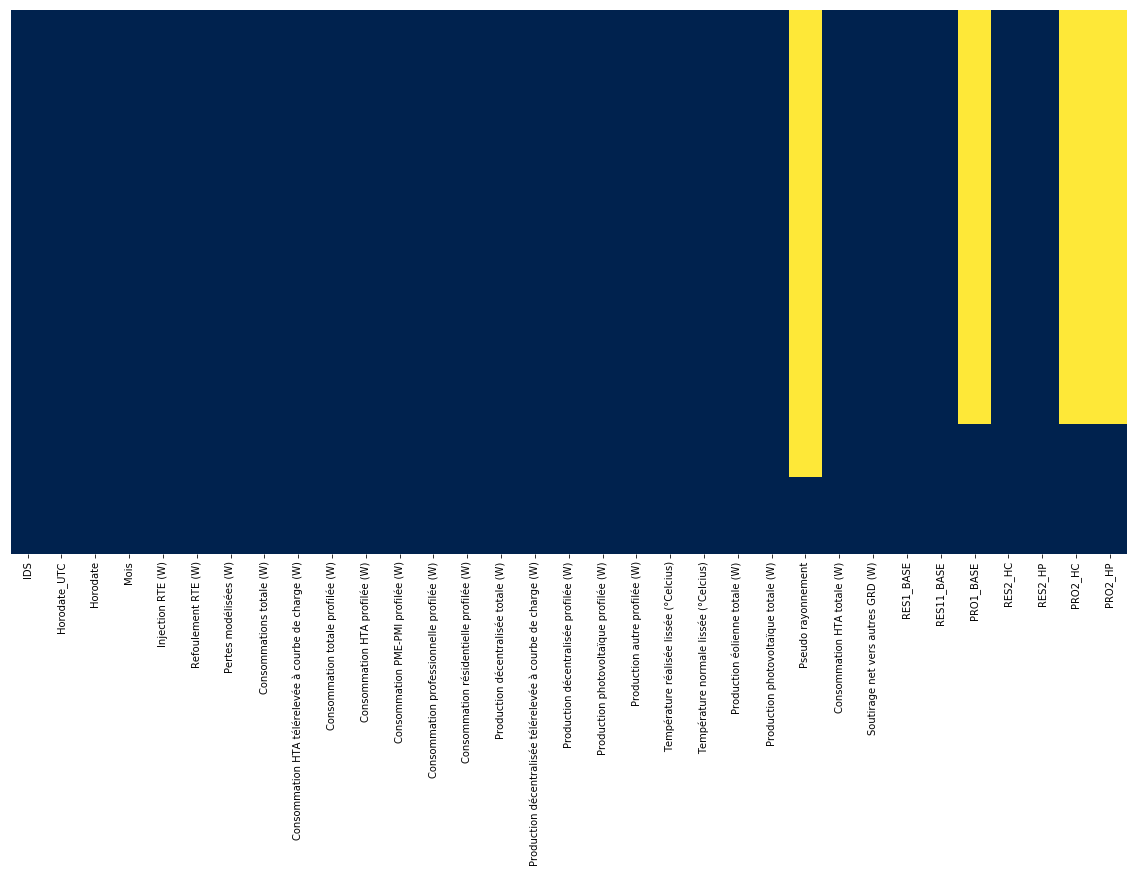

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(train.isna(), cbar = False, annot = False, cmap ="cividis", yticklabels=False)

In [8]:
train['Température normale lissée (°Celcius)'] = train['Température normale lissée (°Celcius)'].apply(lambda x: x+273.15)
train['Température réalisée lissée (°Celcius)'] = train['Température réalisée lissée (°Celcius)'].apply(lambda x: x+273.15)
train = train.rename(columns={'Température normale lissée (°Celcius)': 'Température normale lissée (°K)', 'Température réalisée lissée (°Celcius)': 'Température réalisée lissée (°K)'})

In [9]:
train.head()

,IDS,Horodate_UTC,Horodate,Mois,Injection RTE (W),Refoulement RTE (W),Pertes modélisées (W),Consommations totale (W),Consommation HTA télérelevée à courbe de charge (W),Consommation totale profilée (W),Consommation HTA profilée (W),Consommation PME-PMI profilée (W),Consommation professionnelle profilée (W),Consommation résidentielle profilée (W),Production décentralisée totale (W),Production décentralisée télérelevée à courbe de charge (W),Production décentralisée profilée (W),Production photovoltaïque profilée (W),Production autre profilée (W),Température réalisée lissée (°K),Température normale lissée (°K),Production éolienne totale (W),Production photovoltaïque totale (W),Pseudo rayonnement,Consommation HTA totale (W),Soutirage net vers autres GRD (W),RES1_BASE,RES11_BASE,PRO1_BASE,RES2_HC,RES2_HP,PRO2_HC,PRO2_HP
0,1,13/10/2013 22:00,2013-10-13T00:00:00+02:00,10,39784230000,103415000,2849582877,37576289504,8062590100,29513699404,1009515939,2924365887,4819516366,20760301211,1181480681,1169604460,11876221,0.0,608873.0,282.75,286.65,302936853.0,19660.0,NaN,9072106039,436423300,0.791405,0.698925,NaN,2.780413,0.346364,NaN,NaN
1,2,13/10/2013 22:30,2013-10-13T00:30:00+02:00,10,37114681000,119543000,2603906116,35230706411,8023402840,27207303571,1007708541,2881297990,4765108695,18553188344,1247399186,1235680180,11719006,0.0,608873.0,282.75,286.65,368725682.0,17004.0,NaN,9031111381,407924660,0.693700,0.722778,NaN,2.301527,0.375439,NaN,NaN
2,3,13/10/2013 23:00,2013-10-13T01:00:00+02:00,10,36148675000,136447000,2516689035,34428316838,7982839990,26445476848,966660739,2790724292,4500901592,18187190226,1331017863,1319275090,11742773,0.0,608873.0,282.75,286.65,448572685.0,24299.0,NaN,8949500729,398239990,0.648565,0.678717,NaN,2.361320,0.268125,NaN,NaN
3,4,13/10/2013 23:30,2013-10-13T01:30:00+02:00,10,35488831000,164083000,2457628530,33922151279,7953531370,25968619909,929311479,2653092678,4308193617,18078022135,1435603490,1423884480,11719010,0.0,608873.0,282.65,286.65,550243295.0,23308.0,NaN,8882842849,380571680,0.621059,0.668509,NaN,2.567490,0.192953,NaN,NaN
4,5,14/10/2013 00:00,2013-10-13T02:00:00+02:00,10,34882911000,191859000,2403762298,33447730318,7922448360,25525281958,907509517,2641317515,4166651481,17809803445,1527593647,1515861840,11731807,0.0,608873.0,282.65,286.65,644783673.0,21963.0,NaN,8829957877,367153030,0.612245,0.700487,NaN,2.563460,0.075701,NaN,NaN


In [10]:
cols_to_viz = ['Injection RTE (W)','Refoulement RTE (W)', 'Pertes modélisées (W)',
       'Consommations totale (W)',
       'Consommation HTA télérelevée à courbe de charge (W)',
       'Consommation totale profilée (W)', 'Consommation HTA profilée (W)',
       'Consommation PME-PMI profilée (W)',
       'Consommation professionnelle profilée (W)',
       'Consommation résidentielle profilée (W)',
       'Production décentralisée totale (W)',
       'Production décentralisée télérelevée à courbe de charge (W)',
       'Production décentralisée profilée (W)',
       'Production photovoltaïque profilée (W)',
       'Production autre profilée (W)', 'Température réalisée lissée (°K)',
       'Température normale lissée (°K)', 'Production éolienne totale (W)',
       'Production photovoltaïque totale (W)', 'Pseudo rayonnement',
       'Consommation HTA totale (W)', 'Soutirage net vers autres GRD (W)',
       'RES1_BASE', 'RES11_BASE', 'PRO1_BASE', 'RES2_HC', 'RES2_HP', 'PRO2_HC',
       'PRO2_HP']

C:\Users\emac\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Wall time: 528 ms


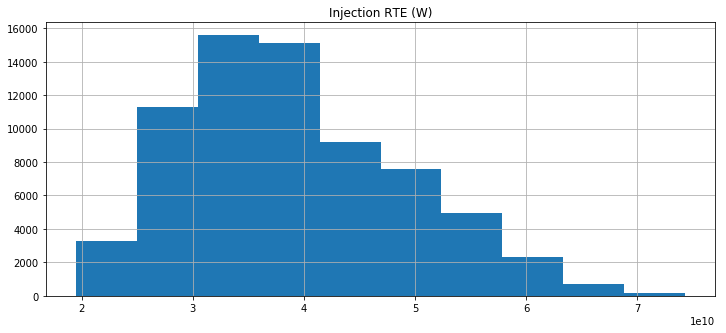

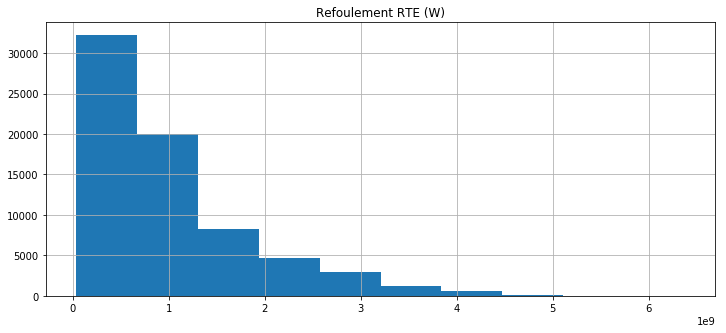

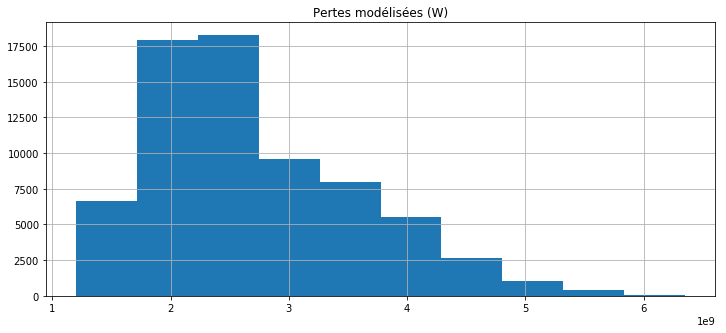

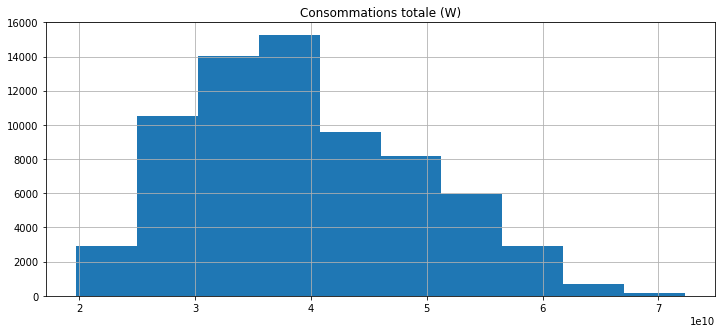

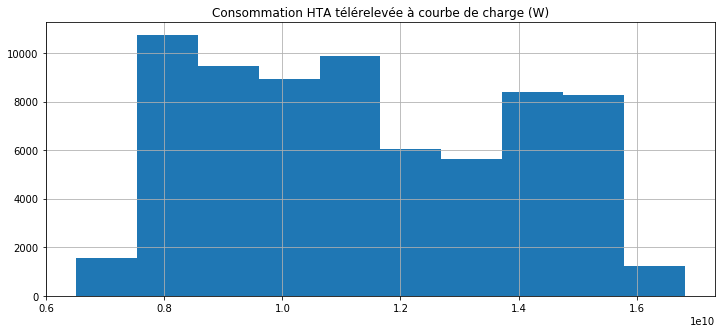

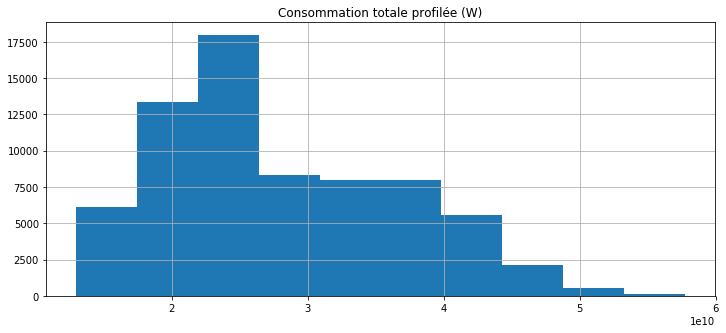

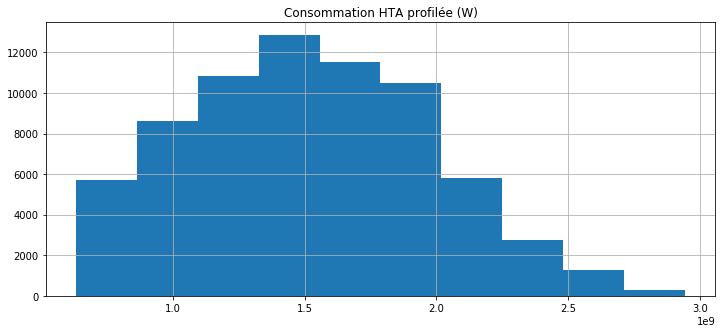

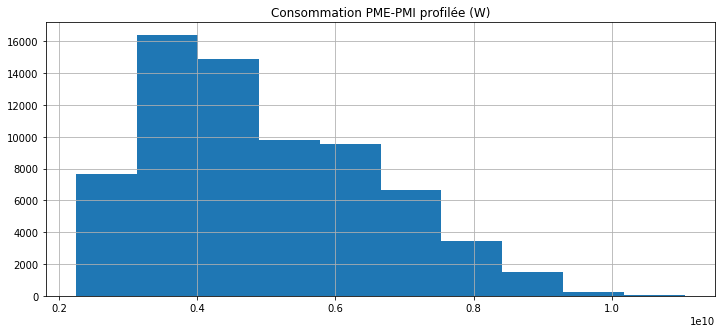

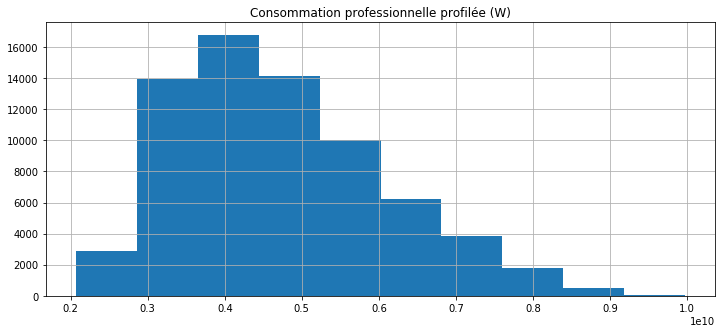

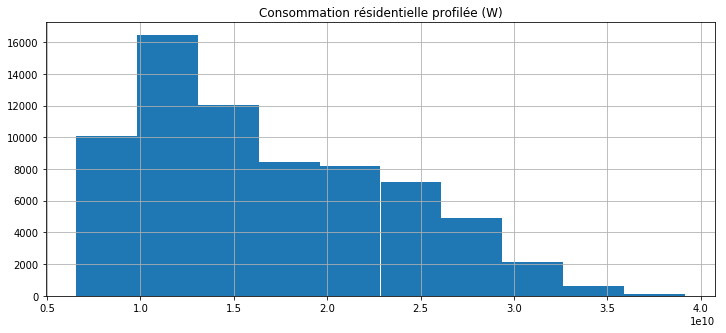

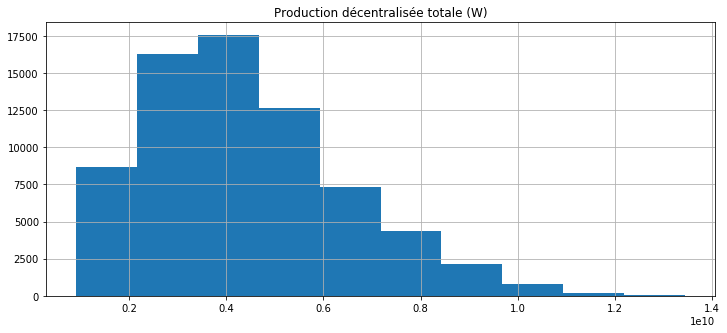

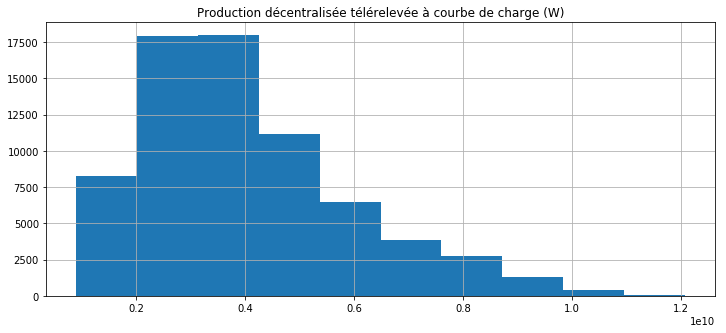

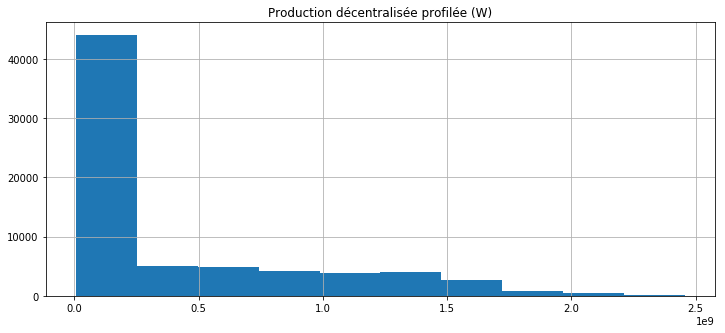

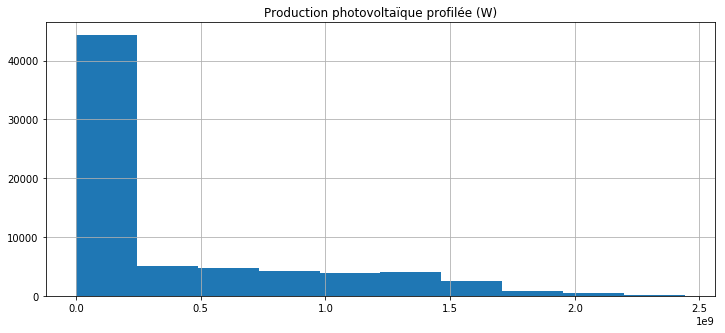

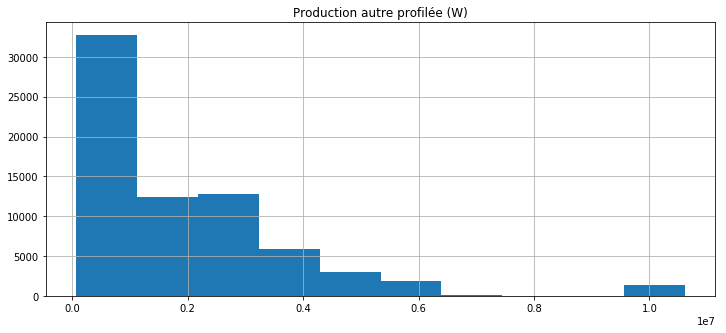

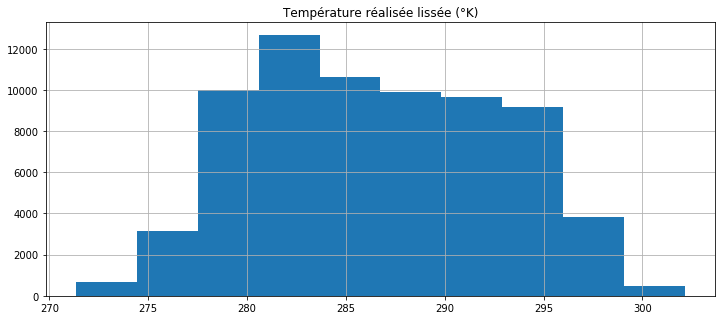

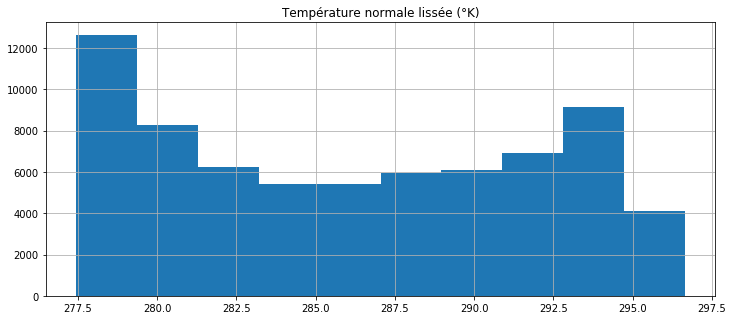

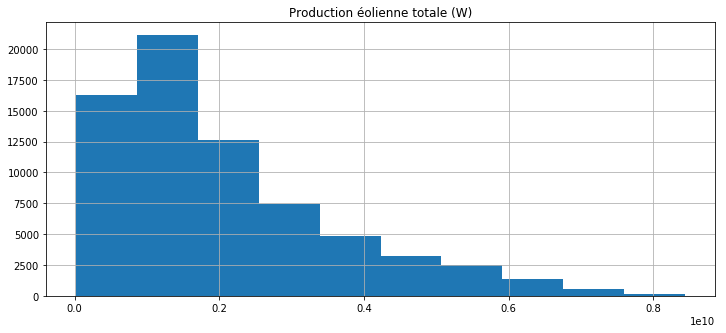

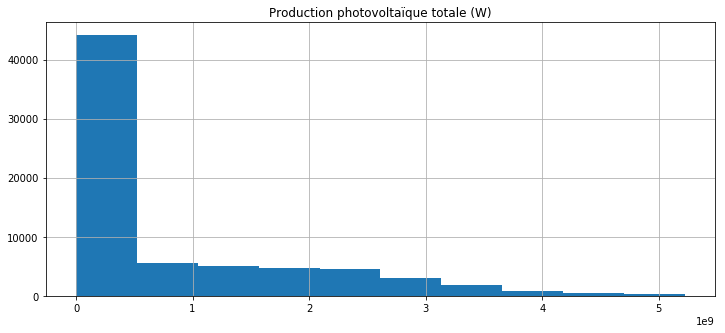

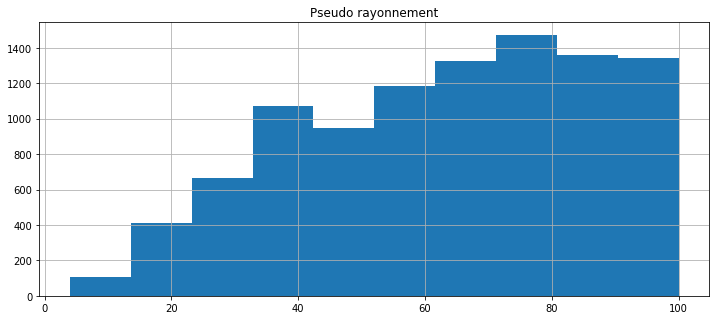

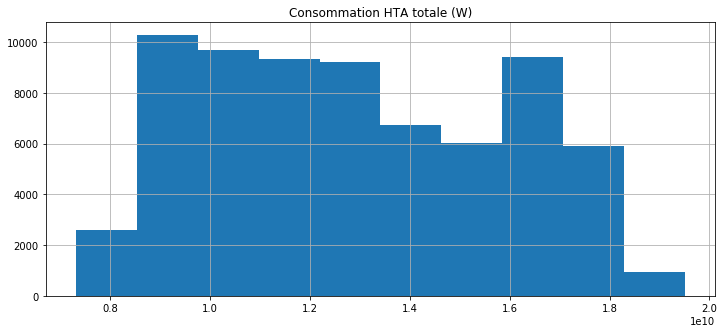

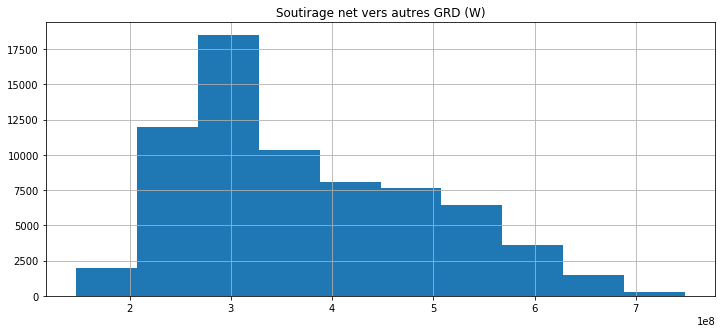

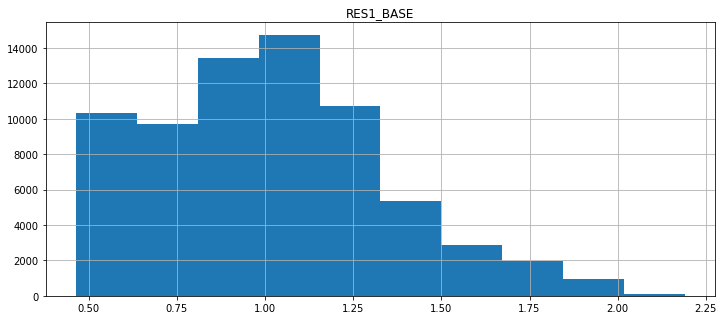

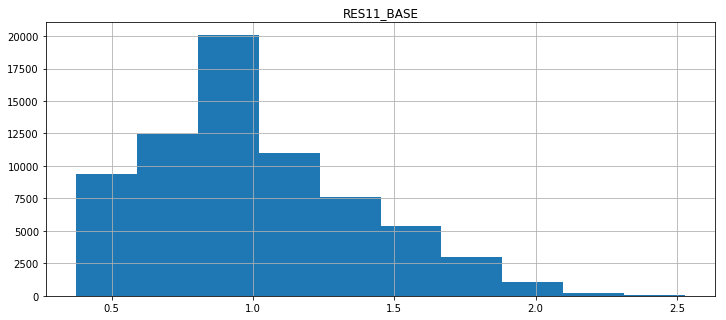

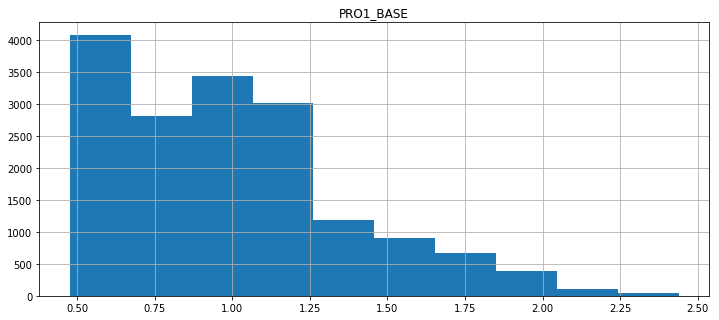

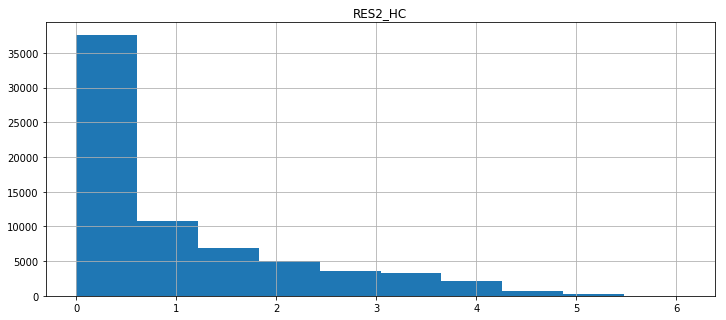

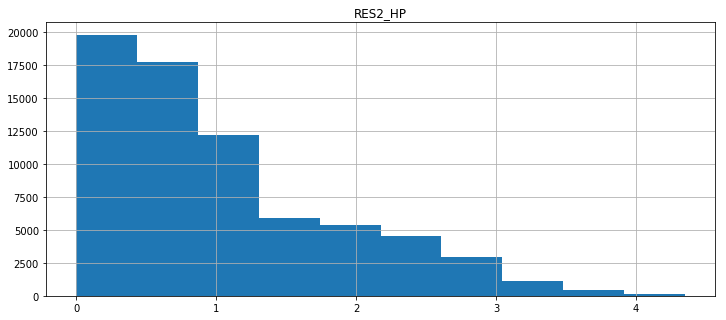

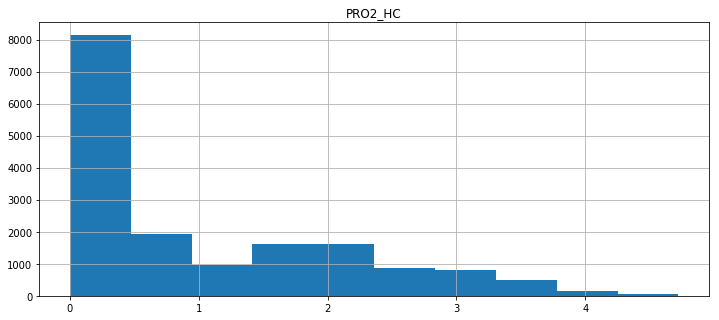

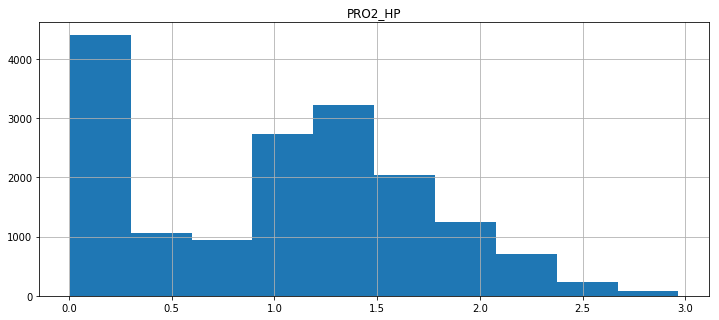

In [11]:
%%time

# Number of columns in our big picture
columns = 1

# Number of rows
rows = len(cols_to_viz)

# Position index
plot_position_in_grid = 1

# Iterate through all attributes
for attr in cols_to_viz:
    
    # Set figure size
    plt.figure(figsize=(12, 6 * rows))
    
    # fix the subplot position
    # plot the distribution
    plt.subplot(rows, columns, plot_position_in_grid)
    plt.title(attr)
    train[attr].hist()

    plot_position_in_grid += 1

In [12]:
train.describe()

,IDS,Mois,Injection RTE (W),Refoulement RTE (W),Pertes modélisées (W),Consommations totale (W),Consommation HTA télérelevée à courbe de charge (W),Consommation totale profilée (W),Consommation HTA profilée (W),Consommation PME-PMI profilée (W),Consommation professionnelle profilée (W),Consommation résidentielle profilée (W),Production décentralisée totale (W),Production décentralisée télérelevée à courbe de charge (W),Production décentralisée profilée (W),Production photovoltaïque profilée (W),Production autre profilée (W),Température réalisée lissée (°K),Température normale lissée (°K),Production éolienne totale (W),Production photovoltaïque totale (W),Pseudo rayonnement,Consommation HTA totale (W),Soutirage net vers autres GRD (W),RES1_BASE,RES11_BASE,PRO1_BASE,RES2_HC,RES2_HP,PRO2_HC,PRO2_HP
count,70128.000000,70128.000000,7.012800e+04,7.012800e+04,7.012800e+04,7.012800e+04,7.012800e+04,7.012800e+04,7.012800e+04,7.012800e+04,7.012800e+04,7.012800e+04,7.012800e+04,7.012800e+04,7.012800e+04,7.012800e+04,7.012800e+04,70128.000000,70128.000000,7.012800e+04,7.012800e+04,9884.000000,7.012800e+04,7.012800e+04,70128.000000,70128.000000,16654.000000,70128.000000,70128.000000,16654.000000,16654.000000
mean,36311.645791,6.523728,3.903467e+10,1.016443e+09,2.710008e+09,3.936041e+10,1.136792e+10,2.799248e+10,1.521529e+09,4.956707e+09,4.730381e+09,1.678387e+10,4.424743e+09,4.036940e+09,3.878029e+08,3.674776e+08,1.772841e+06,286.488601,286.138500,2.054075e+09,7.560020e+08,63.214690,1.288945e+10,3.725561e+08,1.018126,1.005332,0.994580,0.992186,1.018606,1.005489,1.009992
std,22613.359627,3.448722,9.854703e+09,8.505473e+08,8.737662e+08,9.679018e+09,2.548024e+09,8.665369e+09,4.554593e+08,1.589747e+09,1.353797e+09,6.624666e+09,2.029954e+09,1.910628e+09,5.361542e+08,5.365895e+08,2.002542e+06,6.133424,5.851804,1.550645e+09,1.105228e+09,23.150683,2.952540e+09,1.184696e+08,0.327419,0.370323,0.374402,1.181766,0.865476,1.118614,0.698951
min,1.000000,1.000000,1.951452e+10,3.570200e+07,1.202823e+09,1.974821e+10,6.504355e+09,1.298053e+10,6.333796e+08,2.248863e+09,2.070996e+09,6.559456e+09,9.153594e+08,8.972367e+08,6.896886e+06,0.000000e+00,6.944200e+04,271.350000,277.450000,2.118533e+07,1.164400e+04,4.000000,7.314755e+09,1.473411e+08,0.464839,0.375086,0.477145,0.000000,0.000000,0.000000,0.003802
25%,17532.750000,4.000000,3.175362e+10,4.212288e+08,2.075660e+09,3.207500e+10,9.092981e+09,2.150951e+10,1.176633e+09,3.649392e+09,3.683357e+09,1.132264e+10,2.877663e+09,2.612861e+09,2.054498e+07,0.000000e+00,9.941500e+04,281.450000,280.450000,9.073065e+08,3.066700e+04,45.000000,1.028295e+10,2.803922e+08,0.756438,0.758597,0.677279,0.000000,0.291491,0.000000,0.262851
50%,35064.500000,7.000000,3.736196e+10,7.282295e+08,2.473475e+09,3.807145e+10,1.103755e+10,2.550163e+10,1.499332e+09,4.624335e+09,4.517905e+09,1.533113e+10,4.114755e+09,3.646143e+09,3.801786e+07,1.629145e+07,1.656505e+06,286.050000,285.950000,1.586658e+09,2.588167e+07,66.000000,1.256608e+10,3.385897e+08,0.999876,0.934851,0.949498,0.512376,0.825944,0.501144,1.120791
75%,52596.250000,10.000000,4.568327e+10,1.330693e+09,3.270841e+09,4.621237e+10,1.378292e+10,3.473953e+10,1.849438e+09,6.119550e+09,5.587218e+09,2.180775e+10,5.613495e+09,5.032340e+09,6.738169e+08,6.511670e+08,2.649071e+06,291.650000,291.650000,2.794841e+09,1.343411e+09,82.000000,1.561785e+10,4.611393e+08,1.217374,1.230670,1.190569,1.604409,1.503658,1.870684,1.496696
max,87648.000000,12.000000,7.428889e+10,6.377620e+09,6.350213e+09,7.228106e+10,1.681509e+10,5.774080e+10,2.942461e+09,1.105398e+10,9.971889e+09,3.915464e+10,1.343918e+10,1.207248e+10,2.456034e+09,2.441262e+09,1.061291e+07,302.150000,296.650000,8.436008e+09,5.223001e+09,100.000000,1.950506e+10,7.485210e+08,2.190382,2.528628,2.438356,6.085781,4.349528,4.723484,2.966926


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70128 entries, 0 to 70127
Data columns (total 33 columns):
IDS                                                            70128 non-null int64
Horodate_UTC                                                   70128 non-null object
Horodate                                                       70128 non-null object
Mois                                                           70128 non-null int64
Injection RTE (W)                                              70128 non-null int64
Refoulement RTE (W)                                            70128 non-null int64
Pertes modélisées (W)                                          70128 non-null int64
Consommations totale (W)                                       70128 non-null int64
Consommation HTA télérelevée à courbe de charge (W)            70128 non-null int64
Consommation totale profilée (W)                               70128 non-null int64
Consommation HTA profilée (W)                    

# CORRELATIONS

In [49]:
targets = ['RES1_BASE', 'RES11_BASE', 'PRO1_BASE', 'RES2_HC', 'RES2_HP', 'PRO2_HC','PRO2_HP']
for t in targets:
    print(train.corrwith(train[t]).sort_values())

PRO2_HC                                                       -0.589693
RES2_HC                                                       -0.483440
Température normale lissée (°K)                               -0.331051
Température réalisée lissée (°K)                              -0.330101
IDS                                                           -0.145194
Pseudo rayonnement                                            -0.112100
Mois                                                          -0.066495
Refoulement RTE (W)                                            0.053181
Production autre profilée (W)                                  0.062760
Production photovoltaïque totale (W)                           0.112525
Production photovoltaïque profilée (W)                         0.119837
Production décentralisée profilée (W)                          0.122438
Production éolienne totale (W)                                 0.123189
Consommation HTA télérelevée à courbe de charge (W)            0

dtype: float64
PRO2_HP                                                       -0.812521
RES1_BASE                                                     -0.589693
RES2_HP                                                       -0.580881
Production photovoltaïque totale (W)                          -0.426189
Production décentralisée profilée (W)                         -0.423928
Production photovoltaïque profilée (W)                        -0.423773
Consommation PME-PMI profilée (W)                             -0.376634
PRO1_BASE                                                     -0.334733
Consommation HTA télérelevée à courbe de charge (W)           -0.313387
Consommation HTA totale (W)                                   -0.294740
RES11_BASE                                                    -0.268582
Température normale lissée (°K)                               -0.254506
Température réalisée lissée (°K)                              -0.253807
IDS                                              

In [39]:
dfcor = train.drop(['RES1_BASE', 'RES11_BASE', 'PRO1_BASE', 'RES2_HC', 'RES2_HP', 'PRO2_HC','PRO2_HP','Horodate_UTC', 'Horodate'],axis =1)

In [40]:
dfcor.columns

Index(['IDS', 'Mois', 'Injection RTE (W)', 'Refoulement RTE (W)',
       'Pertes modélisées (W)', 'Consommations totale (W)',
       'Consommation HTA télérelevée à courbe de charge (W)',
       'Consommation totale profilée (W)', 'Consommation HTA profilée (W)',
       'Consommation PME-PMI profilée (W)',
       'Consommation professionnelle profilée (W)',
       'Consommation résidentielle profilée (W)',
       'Production décentralisée totale (W)',
       'Production décentralisée télérelevée à courbe de charge (W)',
       'Production décentralisée profilée (W)',
       'Production photovoltaïque profilée (W)',
       'Production autre profilée (W)', 'Température réalisée lissée (°K)',
       'Température normale lissée (°K)', 'Production éolienne totale (W)',
       'Production photovoltaïque totale (W)', 'Pseudo rayonnement',
       'Consommation HTA totale (W)', 'Soutirage net vers autres GRD (W)'],
      dtype='object')

In [41]:
dfcor.drop(['Pertes modélisées (W)','Production décentralisée télérelevée à courbe de charge (W)','Température normale lissée (°K)','Injection RTE (W)','Soutirage net vers autres GRD (W)','Consommation totale profilée (W)','Consommation totale profilée (W)','Production photovoltaïque profilée (W)','Consommation HTA télérelevée à courbe de charge (W)','Production photovoltaïque totale (W)','Consommation professionnelle profilée (W)','Refoulement RTE (W)','Consommation HTA profilée (W)'],axis=1,inplace=True)

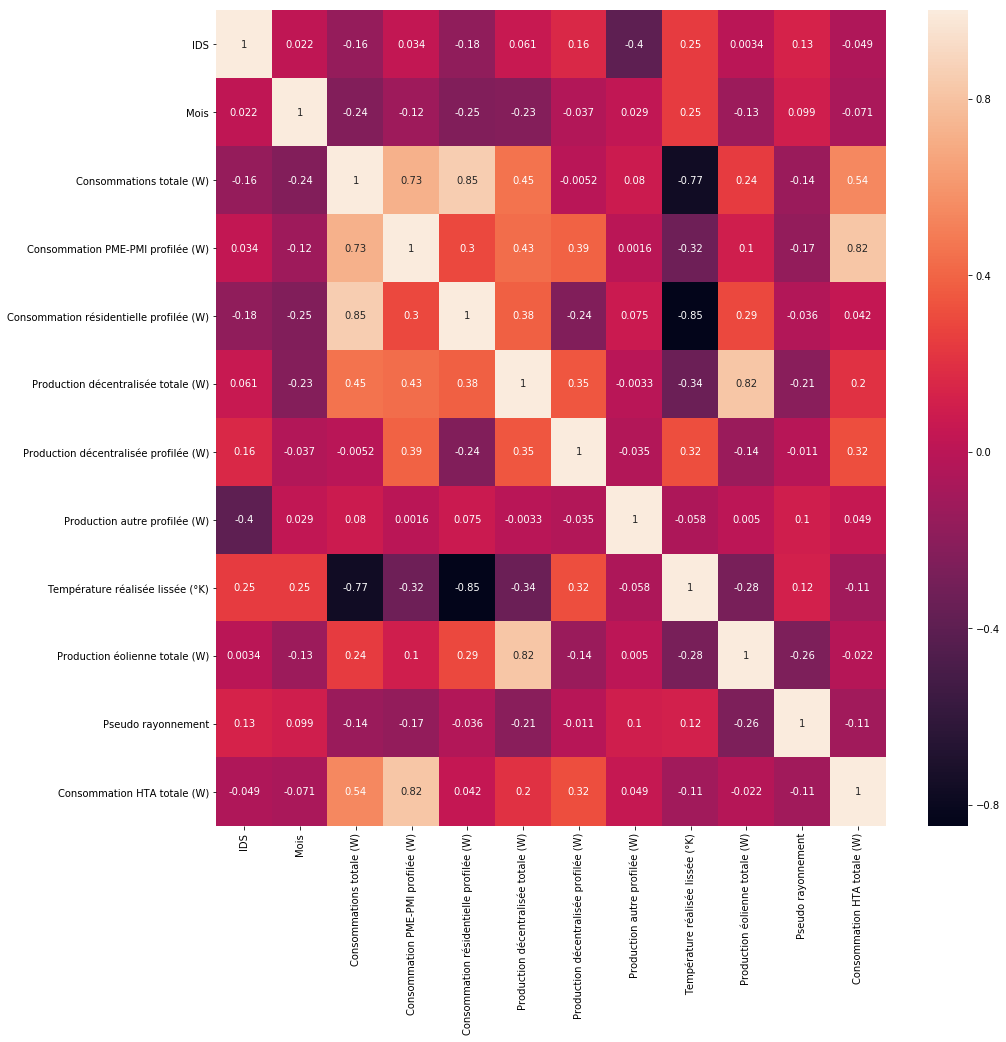

In [42]:
corr_mat = dfcor.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat,annot=True)